# Modelo de regresión lineal

## Modelo con datos simulados
* y = a + x*b
* X : 100 valores distribuidos según una N(1.5,2.5)
* Ye = 5 + 1.9*x + e
* e estará distribuido según una N(0,0.8)


In [1]:
import pandas as pd 
import numpy as np

In [2]:
x = 1.5 + 1.9*np.random.randn(100)

In [3]:
res = 0 + 0.8*np.random.randn(100)

In [4]:
y_pred = 5 + 1.9*x

In [5]:
y_actual = 5 + 1.9*x + res

In [6]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_actual_list = y_actual.tolist()

In [7]:
data = pd.DataFrame({
    'x' : x_list,
    'y' : y_actual_list,
    'y_pred' : y_pred_list
})

In [8]:
data

,x,y,y_pred
0,2.014737,7.602166,8.828001
1,3.345010,10.518720,11.355519
2,2.672782,9.290390,10.078287
3,5.498466,14.887939,15.447086
4,3.057673,11.390783,10.809578
...,...,...,...
95,3.917699,11.357929,12.443628
96,1.759724,9.408914,8.343475
97,1.136260,8.385568,7.158895
98,2.961210,11.958964,10.626298


In [9]:
import matplotlib.pyplot as plt

In [10]:
y_mean = [np.mean(y_actual) for i in range(len(x_list))]

Text(0.5, 1.0, 'Valor Actual vs Predicción')

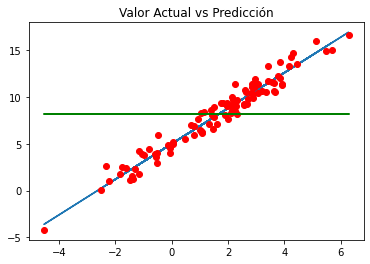

In [11]:
%matplotlib inline 

plt.plot(x,y_pred)
plt.plot(x,y_actual, 'ro')
plt.plot(x,y_mean, 'g')
plt.title('Valor Actual vs Predicción')

In [12]:
data['SSR'] = (data['y_pred']-np.mean(y_actual)) ** 2
data['SSD'] = (data['y_pred']-data['y']) ** 2
data['SST'] = (data['y']-np.mean(y_actual)) ** 2

In [13]:
data.head(10)

,x,y,y_pred,SSR,SSD,SST
0,2.014737,7.602166,8.828001,0.431355,1.502672,0.323828
1,3.345010,10.518720,11.355519,10.139725,0.700232,5.510731
2,2.672782,9.290390,10.078287,3.636884,0.620781,1.252530
3,5.498466,14.887939,15.447086,52.938150,0.312645,45.114250
4,3.057673,11.390783,10.809578,6.960905,0.337799,10.365553
5,2.708390,9.770750,10.145942,3.899506,0.140769,2.558479
6,0.782100,5.923832,6.485991,2.840015,0.316023,5.050777
7,1.444113,8.047162,7.743816,0.182679,0.092019,0.015392
8,-0.981201,3.835152,3.135718,25.356329,0.489207,18.801531
9,1.057239,8.288700,7.008754,1.351339,1.638262,0.013800


In [14]:
SSR = sum(data['SSR'])
SSD = sum(data['SSD'])
SST = sum(data['SST'])

In [15]:
SSR 

1483.6290786503573

In [16]:
SSD

72.68745993867826

In [17]:
SST

1541.2138904341298

In [18]:
SSR + SSD

1556.3165385890356

In [19]:
R2 = SSR / SST

In [20]:
R2

0.9626367163304297

(array([ 3.,  3.,  7., 11., 11., 15., 11., 18., 13.,  8.]),
 array([-2.1786018 , -1.81872349, -1.45884517, -1.09896685, -0.73908854,
        -0.37921022, -0.01933191,  0.34054641,  0.70042473,  1.06030304,
         1.42018136]),
 <BarContainer object of 10 artists>)

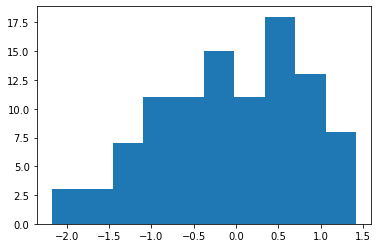

In [23]:
plt.hist((data['y_pred']-data['y']))

# Obteniendo la recta de regresión

* y = a + x*b
* b = cov(x,y) / var(x)
* a = y_media - b*x_media

In [24]:
x_mean = np.mean(data['x'])
y_mean = np.mean(data['y'])
x_mean, y_mean

(1.6277847588061325, 8.171225056485113)

In [25]:
data['beta_cov'] = (data['x']-x_mean) * (data['y']-y_mean)
data['beta_var'] = (data['x']-x_mean)**2 

In [26]:
beta = sum(data['beta_cov']) / sum(data['beta_var'])

In [27]:
alpha = y_mean - beta*x_mean

In [28]:
alpha, beta

(5.092899162479867, 1.8911135992346955)

El modelo lineal obtenido por regresión es: y = 5.09 + 1.89*x

In [29]:
data['y_model'] = alpha + beta*data['x']

In [30]:
data.head(10)

,x,y,y_pred,SSR,SSD,SST,beta_cov,beta_var,y_model
0,2.014737,7.602166,8.828001,0.431355,1.502672,0.323828,-0.220199,0.149732,8.902996
1,3.345010,10.518720,11.355519,10.139725,0.700232,5.510731,4.031177,2.948862,11.418693
2,2.672782,9.290390,10.078287,3.636884,0.620781,1.252530,1.169525,1.092020,10.147434
3,5.498466,14.887939,15.447086,52.938150,0.312645,45.114250,25.998261,14.982175,15.491123
4,3.057673,11.390783,10.809578,6.960905,0.337799,10.365553,4.603606,2.044579,10.875305
5,2.708390,9.770750,10.145942,3.899506,0.140769,2.558479,1.728455,1.167709,10.214773
6,0.782100,5.923832,6.485991,2.840015,0.316023,5.050777,1.900586,0.715182,6.571940
7,1.444113,8.047162,7.743816,0.182679,0.092019,0.015392,0.022787,0.033735,7.823882
8,-0.981201,3.835152,3.135718,25.356329,0.489207,18.801531,11.312753,6.806806,3.237337
9,1.057239,8.288700,7.008754,1.351339,1.638262,0.013800,-0.067025,0.325522,7.092258


In [32]:
SSR = sum((data['y_model']-y_mean)**2)
SSD = sum((data['y_model']-data['y'])**2)
SST = sum((data['y']-y_mean)**2)

In [33]:
SSR, SSD, SST

(1469.1740606319122, 72.03982980221717, 1541.2138904341298)

In [40]:
R2 = SSR / SST
R2

0.9532577338879775

Text(0.5, 1.0, 'Valor Actual vs Predicción')

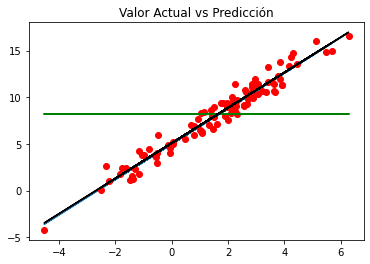

In [39]:
%matplotlib inline 
y_mean = [np.mean(y_actual) for i in range(len(x_list))]

plt.plot(data['x'],data['y_pred'])
plt.plot(data['x'],data['y'], 'ro')
plt.plot(data['x'],y_mean, 'g')
plt.plot(data['x'],data['y_model'], 'k')
plt.title('Valor Actual vs Predicción')

(array([ 3.,  3.,  7., 11., 12., 13., 11., 18., 11., 11.]),
 array([-2.10566289, -1.74704955, -1.3884362 , -1.02982286, -0.67120951,
        -0.31259616,  0.04601718,  0.40463053,  0.76324387,  1.12185722,
         1.48047057]),
 <BarContainer object of 10 artists>)

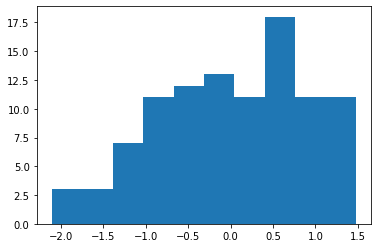

In [37]:
plt.hist((data['y_model']-data['y']))

# Error estándar de los Residuos (RSE)

In [41]:
RSE = np.sqrt(SSD / (len(data)-2))
RSE

0.8573799065200075

In [42]:
np.mean(data['y'])

8.171225056485113

In [43]:
RSE /np.mean(data['y'])

0.10492672770523506